In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
# Столбцы с неизвестными значениями
train_data.isna().sum().loc[lambda x: x != 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [5]:
# Удалим столбцы, в которых слишком много NaN: Alley, MasVnrType, FireplaceQu, PoolQC, Fence, MiscFeature + id
X_data = train_data.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'SalePrice', 'Id'], axis=1)
y_data = train_data.SalePrice

In [6]:
# Теперь нужно заменить NaN в остальных колонках

<Axes: >

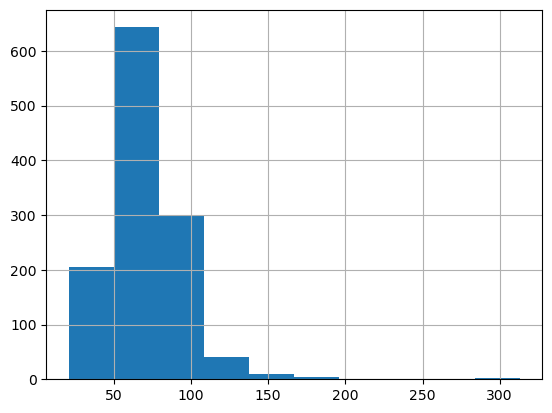

In [7]:
# Посмотрим распределение LotFrontage
X_data.LotFrontage.hist()

In [8]:
# Используем среднее значение
mean_LotFrontage = X_data.LotFrontage.mean().round(0)
X_data.LotFrontage = X_data.LotFrontage.fillna(mean_LotFrontage)

In [9]:
X_data.isna().sum().loc[lambda x: x != 0]

MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

<Axes: >

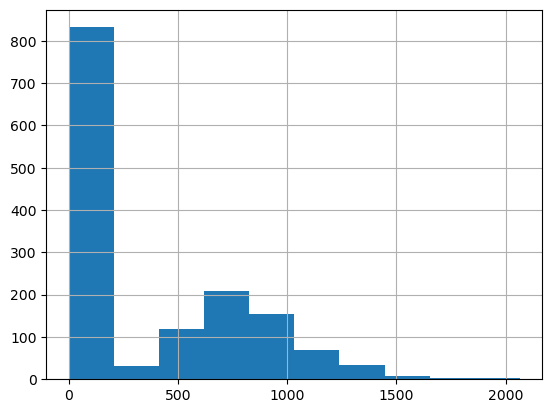

In [10]:
X_data['2ndFlrSF'].hist()

In [11]:
# Заполняем ср. значением: MasVnrArea, GarageYrBlt
# Заполняем:
# BsmtQual -> Gd/2 и TA/2
# BsmtCond -> TA
# BsmtExposure -> No
# BsmtFinType1 -> GLQ/2 и Unf/2
# BsmtFinType2 -> Unf
# Electrical -> SBrkr
# GarageType -> Attchd
# GarageFinish -> RFn/3, Unf/3, Fin/3
# GarageQual -> TA
# GarageCond -> TA

In [12]:
# Заполняем ср. значением: MasVnrArea, GarageYrBlt
mean_MasVnrArea = X_data.MasVnrArea.mean().round(0)
mean_GarageYrBlt = X_data.GarageYrBlt.mean().round(0)

X_data.MasVnrArea = X_data.MasVnrArea.fillna(mean_MasVnrArea)
X_data.GarageYrBlt = X_data.GarageYrBlt.fillna(mean_GarageYrBlt)

In [13]:
# np.where(условие, значение_если_True, значение_если_False) — аналог if-else для массивов.
# np.arange(3) - создает array последовательность чисел (0, 1, 2 ...)
# pd.Series(..., index=...)

count_NaN_BsmtQual = X_data.BsmtQual.isna().sum()  # Кол-во NaN
first_part_BsmtQual = count_NaN_BsmtQual // 2      # Первая половина

BsmtQual_noNaN = np.where(np.arange(count_NaN_BsmtQual) < first_part_BsmtQual, 'Gd', 'TA')  # Последовательность наполовину из Gd и на половину из TA
X_data.BsmtQual = X_data.BsmtQual.fillna(
    pd.Series(BsmtQual_noNaN, index=X_data[X_data.BsmtQual.isna()].index))  # Заменяем NaN на наши значения с соответствующими индексами

In [14]:
count_NaN_BsmtFinType1 = X_data.BsmtFinType1.isna().sum()
first_part_BsmtFinType1 = count_NaN_BsmtFinType1 // 2

BsmtFinType1_noNaN = np.where(np.arange(count_NaN_BsmtFinType1) < first_part_BsmtFinType1, 'GLQ', 'Unf')
X_data.BsmtFinType1 = X_data.BsmtFinType1.fillna(
    pd.Series(BsmtFinType1_noNaN, index=X_data[X_data.BsmtFinType1.isna()].index)
)

In [15]:
count_NaN_GarageFinish = X_data.GarageFinish.isna().sum()
first_part_GarageFinish = count_NaN_GarageFinish // 3
second_part_GarageFinish = first_part_GarageFinish * 2

GarageFinish_noNaN = np.where(np.arange(count_NaN_GarageFinish) < first_part_GarageFinish, 'RFn',
         np.where(np.arange(count_NaN_GarageFinish) < second_part_GarageFinish, 'Unf', 'Fin'))      # Вложенное условие np.where
X_data.GarageFinish = X_data.GarageFinish.fillna(
    pd.Series(GarageFinish_noNaN, index=X_data[X_data.GarageFinish.isna()].index)
)

In [16]:
X_data.BsmtCond = X_data.BsmtCond.fillna('TA')
X_data.BsmtExposure = X_data.BsmtExposure.fillna('No')
X_data.BsmtFinType2 = X_data.BsmtFinType2.fillna('Unf')
X_data.Electrical = X_data.Electrical.fillna('SBrkr')
X_data.GarageType = X_data.GarageType.fillna('Attchd')
X_data.GarageQual = X_data.GarageQual.fillna('TA')
X_data.GarageCond = X_data.GarageCond.fillna('TA')

In [17]:
X_data.isna().sum().loc[lambda x: x != 0]

Series([], dtype: int64)

In [18]:
X_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,0,4,2010,WD,Normal


In [19]:
# X_data.to_csv('X_data.csv')

In [20]:
X_data['MSZoning'].value_counts().sort_values(ascending=False)

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [21]:
# Проверим количество каждого встречаемого значения в фичах. При полном дисбалансе - убираем фичу
# for col in X_data.columns:
#     print(f"\nСтолбец: {col}")
#     print(X_data[col].value_counts())

In [22]:
# Следующие фичи будут удалены всвязи с полным дисбалансом данных, которые не информативны:
# MSZoning, Street, LandContour, Utilities, LandSlope, Condition1, Condition2, BldgType, RoofMatl, ExterCond, BsmtCond, 
# BsmtFinType2, BsmtFinSF2, Heating, CentralAir, Electrical, LowQualFinSF, BsmtHalfBath, KitchenAbvGr, Functional, GarageQual,
# GarageCond, PavedDrive, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, SaleType, SaleCondition

In [23]:
X_data = X_data.drop(['MSZoning', 'Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl',
             'ExterCond', 'BsmtCond', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath',
             'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
             'PoolArea', 'MiscVal', 'SaleType', 'SaleCondition'], axis=1)

In [24]:
X_data

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,...,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold
0,60,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,...,0,Attchd,2003.0,RFn,2,548,0,61,2,2008
1,20,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,...,1,Attchd,1976.0,RFn,2,460,298,0,5,2007
2,60,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2001,...,1,Attchd,2001.0,RFn,2,608,0,42,9,2008
3,70,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1915,...,1,Detchd,1998.0,Unf,3,642,0,35,2,2006
4,60,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,...,1,Attchd,2000.0,RFn,3,836,192,84,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,Reg,Inside,Gilbert,2Story,6,5,1999,...,1,Attchd,1999.0,RFn,2,460,0,40,8,2007
1456,20,85.0,13175,Reg,Inside,NWAmes,1Story,6,6,1978,...,2,Attchd,1978.0,Unf,2,500,349,0,2,2010
1457,70,66.0,9042,Reg,Inside,Crawfor,2Story,7,9,1941,...,2,Attchd,1941.0,RFn,1,252,0,60,5,2010
1458,20,68.0,9717,Reg,Inside,NAmes,1Story,5,6,1950,...,0,Attchd,1950.0,Unf,1,240,366,0,4,2010


In [25]:
# Проверим числовые данные на наличие выбросов через Boxplot

<function matplotlib.pyplot.show(close=None, block=None)>

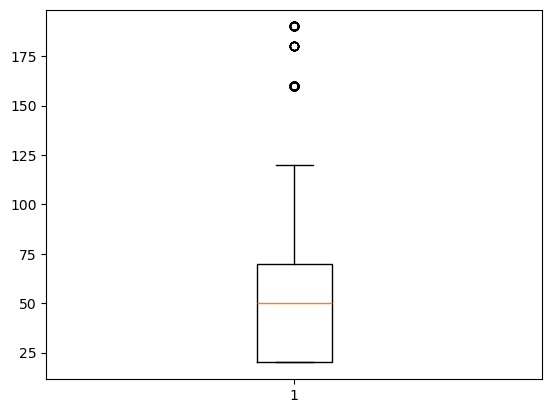

In [26]:
plt.boxplot(X_data.MSSubClass)
plt.show

In [27]:
# Найдем Q1 и Q3 квартили, а также медиану и "усы ящика" (граничные значения, за которыми считаются выбросы)
Q1 = np.quantile(X_data.MSSubClass, 0.25)
Q2 = np.median(X_data.MSSubClass)
Q3 = np.quantile(X_data.MSSubClass, 0.75)
print(Q1)
print(Q2)
print(Q3)

20.0
50.0
70.0


In [28]:
# Определяем границы для выбросов
IQR = Q3 - Q1
upper_outlier_threshold = Q3 + 1.5 * IQR
lower_outlier_threshold = Q1 - 1.5 * IQR
print(upper_outlier_threshold)
print(lower_outlier_threshold)

145.0
-55.0


In [29]:
# Определяем "усы ящика"
upper_whisker = X_data.MSSubClass[X_data.MSSubClass <= upper_outlier_threshold].max()
lower_whisker = X_data.MSSubClass[X_data.MSSubClass >= lower_outlier_threshold].min()
print(upper_whisker)
print(lower_whisker)

120
20


In [30]:
# Фактический нижний ус совпадает с нижней границей ящика

In [31]:
# Все значения, находящиеся за пределами граничных значений, считаются выбросами 
outliers = X_data.MSSubClass[(X_data.MSSubClass > upper_outlier_threshold) | (X_data.MSSubClass < lower_outlier_threshold)]
print(outliers.sort_values())

687     160
1104    160
490     160
500     160
504     160
       ... 
985     190
705     190
713     190
1190    190
9       190
Name: MSSubClass, Length: 103, dtype: int64


In [32]:
# Т.к. метод Boxplot хорошо подходит для распределений, близких к нормальному, а в нашем случае это не так,
# здесь он слишком строг и отбрасывает много данных (7%). В нормальном распределение должнобыть примерно 0,7%
# В таком случае, правильней использовать 1-й и 99-й перцентиль

In [33]:
np.quantile(X_data.MSSubClass, 0.95)

160.0

In [34]:
# Ограничим значения колонок 1ым и 99ым персентилем, кроме категориальных колонок (или колонок с датами)

outliers_X_data = pd.DataFrame()

# Колонки, которые не нужно обрабатывать по выбросам, т.к. он категориальные или с датами
exception = ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath',
             'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold']

# Создание DataFrame
i=0
for col in X_data.select_dtypes(include=['int64', 'float64']):
    if col in exception:
       continue 
    quantile_1 = X_data[col].quantile(0.01)
    quantile_99 = X_data[col].quantile(0.99)
    count_outliers_befor = ((X_data[col] < quantile_1) | (X_data[col] > quantile_99)).sum()
    data_temporary = pd.DataFrame({'columns': [col], 'quantile_1': [quantile_1], 'quantile_99': [quantile_99], 
                                   'count_outliers_before': [count_outliers_befor]}, index=[i])
    
    outliers_X_data = pd.concat([outliers_X_data, data_temporary])
    i += 1

In [35]:
outliers_X_data

,columns,quantile_1,quantile_99,count_outliers_before
0,LotFrontage,21.00,137.41,15
1,LotArea,1680.00,37567.64,22
2,MasVnrArea,0.00,791.28,15
3,BsmtFinSF1,0.00,1572.41,15
4,BsmtUnfSF,0.00,1797.05,15
5,TotalBsmtSF,0.00,2155.05,15
6,1stFlrSF,520.00,2219.46,27
7,2ndFlrSF,0.00,1418.92,15
8,GrLivArea,692.18,3123.48,30
9,GarageArea,0.00,1002.79,15


In [36]:
# Обработка выбросов (если значения ниже минимального или выше максимального, то они примут эти граничные значения)
X_data_2 = X_data

for col in X_data.select_dtypes(include=['int64', 'float64']).columns:
    if col in exception:
       continue 
    quant_1 = float(outliers_X_data[outliers_X_data['columns'] == col].quantile_1.iloc[0])
    quant_99 = float(outliers_X_data[outliers_X_data['columns'] == col].quantile_99.iloc[0])
    
    X_data_2[col] = X_data[col].clip(lower=quant_1, upper=quant_99)
  

In [37]:
X_data_2

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,...,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold
0,60,65.0,8450.0,Reg,Inside,CollgCr,2Story,7,5,2003,...,0,Attchd,2003.0,RFn,2,548.0,0.00,61.0,2,2008
1,20,80.0,9600.0,Reg,FR2,Veenker,1Story,6,8,1976,...,1,Attchd,1976.0,RFn,2,460.0,298.00,0.0,5,2007
2,60,68.0,11250.0,IR1,Inside,CollgCr,2Story,7,5,2001,...,1,Attchd,2001.0,RFn,2,608.0,0.00,42.0,9,2008
3,70,60.0,9550.0,IR1,Corner,Crawfor,2Story,7,5,1915,...,1,Detchd,1998.0,Unf,3,642.0,0.00,35.0,2,2006
4,60,84.0,14260.0,IR1,FR2,NoRidge,2Story,8,5,2000,...,1,Attchd,2000.0,RFn,3,836.0,192.00,84.0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917.0,Reg,Inside,Gilbert,2Story,6,5,1999,...,1,Attchd,1999.0,RFn,2,460.0,0.00,40.0,8,2007
1456,20,85.0,13175.0,Reg,Inside,NWAmes,1Story,6,6,1978,...,2,Attchd,1978.0,Unf,2,500.0,349.00,0.0,2,2010
1457,70,66.0,9042.0,Reg,Inside,Crawfor,2Story,7,9,1941,...,2,Attchd,1941.0,RFn,1,252.0,0.00,60.0,5,2010
1458,20,68.0,9717.0,Reg,Inside,NAmes,1Story,5,6,1950,...,0,Attchd,1950.0,Unf,1,240.0,366.00,0.0,4,2010


In [38]:
# Расчет количества выбросов по старым квантилям (проверка на то, что их не осталось)
count_outliers_after = list()
for col in outliers_X_data['columns']:

    quant_1 = float(outliers_X_data[outliers_X_data['columns'] == col].quantile_1.iloc[0])
    quant_99 = float(outliers_X_data[outliers_X_data['columns'] == col].quantile_99.iloc[0])
    
    temp_outliers = ((X_data_2[col] < quant_1) | (X_data_2[col] > quant_99)).sum()
    count_outliers_after.append(temp_outliers)

outliers_X_data_2 = pd.concat([outliers_X_data, pd.Series(count_outliers_after)], axis=1).rename(columns={0: 'count_outliers_after'})


In [39]:
outliers_X_data_2

,columns,quantile_1,quantile_99,count_outliers_before,count_outliers_after
0,LotFrontage,21.00,137.41,15,0
1,LotArea,1680.00,37567.64,22,0
2,MasVnrArea,0.00,791.28,15,0
3,BsmtFinSF1,0.00,1572.41,15,0
4,BsmtUnfSF,0.00,1797.05,15,0
5,TotalBsmtSF,0.00,2155.05,15,0
6,1stFlrSF,520.00,2219.46,27,0
7,2ndFlrSF,0.00,1418.92,15,0
8,GrLivArea,692.18,3123.48,30,0
9,GarageArea,0.00,1002.79,15,0


ОБРАБОТКА ДАННЫХ ДЛЯ МАШИННОГО ОБУЧЕНИЯ

One-Hot Encoding (OHE) - Создание отдельных бинарных столбцов для каждой категории:

In [41]:
# Оценка того, стоит ли сгрупировывать малочисленные районы в один - other, чтобы уменьшить кол-во фичей (сейчас 25 районов)
# Ответ - нет, т.к. параметр с районами один из самых важных при определении стоимости
# .query('Neighborhood in @other')
other_Neighborhood = ['Blueste', 'NPkVill', 'Veenker', 'BrDale', 'MeadowV', 'Blmngtn', 'SWISU', 'StoneBr', 'ClearCr', 'IDOTRR', 'Timber', 'NoRidge', 'Mitchel', 'Crawfor', 'BrkSide', 'SawyerW']
Neighborhood_temp = train_data.\
     groupby('Neighborhood', as_index=False).\
     aggregate({'LotArea': 'count', 'SalePrice' : "mean"}).round(2).\
     rename(columns={'LotArea': 'count', 'SalePrice': 'SalePrice_mean'}).\
     sort_values('count', ascending=False)

Neighborhood_temp.query('count < 70').sort_values('SalePrice_mean', ascending=False)

,Neighborhood,count,SalePrice_mean
15,NoRidge,41,335295.32
22,StoneBr,25,310499.00
23,Timber,38,242247.45
24,Veenker,11,238772.73
4,ClearCr,28,212565.43
6,Crawfor,51,210624.73
0,Blmngtn,17,194870.88
20,SawyerW,59,186555.80
11,Mitchel,49,156270.12
13,NPkVill,9,142694.44


In [42]:
# Распределим районы с кол-вом продаж не более 70шт. (всего 16 рай-ов) на 4 группы по ценам(тыс. $): 98-150, 150-200, 200-250, 300-340
other_Neighborhood_1 = ['MeadowV', 'IDOTRR', 'BrDale', 'BrkSide', 'Blueste', 'SWISU', 'NPkVill']
other_Neighborhood_2 = ['Blmngtn', 'SawyerW', 'Mitchel']
other_Neighborhood_3 = ['Timber', 'Veenker', 'ClearCr', 'Crawfor']
other_Neighborhood_4 = ['StoneBr', 'NoRidge']
X_data_2.Neighborhood = X_data_2.Neighborhood.apply(lambda x: 'other_1' if x in other_Neighborhood_1
                                                    else 'other_2' if x in other_Neighborhood_2
                                                    else 'other_3' if x in other_Neighborhood_3
                                                    else 'other_4' if x in other_Neighborhood_4
                                                    else x)

In [43]:
# Проверка замены
X_data_2.groupby('Neighborhood', as_index=False).\
        aggregate({'HouseStyle': 'count'}).\
        rename(columns={'HouseStyle': 'count'})

,Neighborhood,count
0,CollgCr,150
1,Edwards,100
2,Gilbert,79
3,NAmes,225
4,NWAmes,73
5,NridgHt,77
6,OldTown,113
7,Sawyer,74
8,Somerst,86
9,other_1,164


In [44]:
# В MSSubClass есть 15 классов, нужно сократить
temp_MSSubClass = train_data.groupby('MSSubClass', as_index=False).\
        aggregate({'LotArea': 'count', 'SalePrice': 'mean'}).\
        rename(columns={'LotArea': 'count', 'SalePrice': 'SalePrice_mean'}).\
        sort_values('count', ascending=False)
temp_MSSubClass.query('SalePrice_mean > 201000')

,MSSubClass,count,SalePrice_mean
5,60,299,239948.501672


In [45]:
MSSubClass_1 = [50, 30, 160, 90, 190, 85, 45, 180]
MSSubClass_2 = [20, 120, 70, 80, 75, 40]
MSSubClass_3 = [60]
X_data_2.MSSubClass = X_data_2.MSSubClass.apply(lambda x: '_1' if x in MSSubClass_1 else '_2' if x in MSSubClass_2 else '_3' if x in MSSubClass_3 else x)

In [46]:
X_data_2.MSSubClass.value_counts()

MSSubClass
_2    761
_1    400
_3    299
Name: count, dtype: int64

In [47]:
# Из всех стилей HouseStyle можно объединить малочисленные, кроме "2.5Fin", т.к. у него средняя цена намного выше среднего, у остльных ниже (SFoyer, 1.5Unf, 2.5Unf)
train_data.groupby('HouseStyle', as_index=False).\
            aggregate({'LotArea': 'count', 'SalePrice': 'mean'}).\
            rename(columns={'LotArea': 'count', 'SalePrice': 'SalePrice_mean'}).\
            sort_values('count', ascending=False)

,HouseStyle,count,SalePrice_mean
2,1Story,726,175985.477961
5,2Story,445,210051.764045
0,1.5Fin,154,143116.740260
7,SLvl,65,166703.384615
6,SFoyer,37,135074.486486
1,1.5Unf,14,110150.000000
4,2.5Unf,11,157354.545455
3,2.5Fin,8,220000.000000


In [48]:
# Осуществляем замену, сами цены оставляем как есть
other_HouseStyle = ['SFoyer', '1.5Unf', '2.5Unf']
X_data_3 = X_data_2
X_data_3['HouseStyle'] = X_data_3['HouseStyle'].apply(lambda x: 'other' if x in other_HouseStyle else x)

In [49]:
X_data_3['HouseStyle'].value_counts()

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
other      62
2.5Fin      8
Name: count, dtype: int64

In [50]:
# Колонка Exterior1st
train_data.groupby('Exterior1st', as_index=False).\
            aggregate({'LotArea': 'count', 'SalePrice': 'mean'}).\
            rename(columns={'LotArea': 'count', 'SalePrice': 'SalePrice_mean'}).\
            sort_values('count', ascending=False)

,Exterior1st,count,SalePrice_mean
12,VinylSd,515,213732.900971
6,HdBoard,222,163077.450450
8,MetalSd,220,149422.177273
13,Wd Sdng,206,149841.645631
9,Plywood,108,175942.379630
5,CemntBd,61,231690.655738
3,BrkFace,50,194573.000000
14,WdShing,26,150655.076923
11,Stucco,25,162990.000000
0,AsbShng,20,107385.550000


In [51]:
# Для колонки с отделкой фасада Exterior1st объединим в other [WdShing, Stucco, AsbShng, BrkComm, Stone, AsphShn, ImStucc, CBlock]
# т.к. их общее кол-во 78шт, что примерно равно 5% от всех данных. Это позволит уменьшить кол-во фичей после One-Hot Encoding.
oter_Exterior1st = ['WdShing', 'Stucco', 'AsbShng', 'BrkComm', 'Stone', 'AsphShn', 'ImStucc', 'CBlock']
X_data_3['Exterior1st'] = X_data_3['Exterior1st'].apply(lambda x: 'other' if x in oter_Exterior1st else x)
X_data_3['Exterior1st'].value_counts()

Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
other       78
CemntBd     61
BrkFace     50
Name: count, dtype: int64

In [52]:
# Колонка Exterior2nd на 82% повторяет колонку Exterior1st, а значит удаляем ее
X_data_3[['Exterior1st', 'Exterior2nd']].query('Exterior1st != Exterior2nd')

,Exterior1st,Exterior2nd
3,Wd Sdng,Wd Shng
8,BrkFace,Wd Shng
11,other,Wd Shng
12,HdBoard,Plywood
19,BrkFace,Plywood
...,...,...
1416,VinylSd,AsbShng
1448,MetalSd,HdBoard
1449,CemntBd,CmentBd
1451,CemntBd,CmentBd


In [53]:
X_data_3 = X_data_3.drop(['Exterior2nd'], axis=1)

In [54]:
X_data_3.GarageCars .value_counts()

GarageCars
2    824
1    369
3    181
0     81
4      5
Name: count, dtype: int64

Перед тем как заменить категориальные переменные по One-Hot Encoding, проверим корреляцию между числовыми фичами

In [56]:
X_data_3.select_dtypes(include=['int64', 'float64'])

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold
0,65.0,8450.0,7,5,2003,2003,196.0,706.0,150.0,856.0,...,3,8,0,2003.0,2,548.0,0.00,61.0,2,2008
1,80.0,9600.0,6,8,1976,1976,0.0,978.0,284.0,1262.0,...,3,6,1,1976.0,2,460.0,298.00,0.0,5,2007
2,68.0,11250.0,7,5,2001,2002,162.0,486.0,434.0,920.0,...,3,6,1,2001.0,2,608.0,0.00,42.0,9,2008
3,60.0,9550.0,7,5,1915,1970,0.0,216.0,540.0,756.0,...,3,7,1,1998.0,3,642.0,0.00,35.0,2,2006
4,84.0,14260.0,8,5,2000,2000,350.0,655.0,490.0,1145.0,...,4,9,1,2000.0,3,836.0,192.00,84.0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917.0,6,5,1999,2000,0.0,0.0,953.0,953.0,...,3,7,1,1999.0,2,460.0,0.00,40.0,8,2007
1456,85.0,13175.0,6,6,1978,1988,119.0,790.0,589.0,1542.0,...,3,7,2,1978.0,2,500.0,349.00,0.0,2,2010
1457,66.0,9042.0,7,9,1941,2006,0.0,275.0,877.0,1152.0,...,4,9,2,1941.0,1,252.0,0.00,60.0,5,2010
1458,68.0,9717.0,5,6,1950,1996,0.0,49.0,0.0,1078.0,...,2,5,0,1950.0,1,240.0,366.00,0.0,4,2010


In [57]:
# Коэффициент корреляции Пирсона используется для нормальных распределений и линейной зависимости фичей, но подойдет в кажечестве первоначальной оценки 
# зависимости фичей друг от друга, т.к. кол-во наблюдений большое

In [58]:
# Коэф. корреляции между YearBuilt и YearRemodAdd
correlation = X_data_3['YearBuilt'].corr(X_data_3.YearRemodAdd)
correlation

0.5928549763436504

In [59]:
# Матрица коэф-ов корреляции Пирсона для всех числовых фичей. Примем пороговое значение 0,7 для определения мультиколлинеарности
correlation_matrix = X_data_3.corr(numeric_only=True)
filtered_correlation = correlation_matrix[correlation_matrix.abs() > 0.7]
filtered_correlation.iloc[:, :14]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath
LotFrontage,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallCond,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
BsmtUnfSF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
TotalBsmtSF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.803791,NaN,NaN,NaN


In [60]:
filtered_correlation.iloc[:, 14:]

,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold
LotFrontage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallCond,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,NaN,0.779457,NaN,NaN,NaN,NaN,NaN,NaN
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtUnfSF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalBsmtSF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# Фичи, значения коэф. корреляции которых превышают 0,7:
# GarageYrBlt - YearBuilt, 1stFlrSF - TotalBsmtSF, TotRmsAbvGrd - GrLivArea, GarageArea - GarageCars
# Проверим корреляцию между этими параметрами и ценой продажи дома
z = pd.concat([X_data_3, y_data], axis=1)
z[['GarageYrBlt', 'YearBuilt', '1stFlrSF', 'TotalBsmtSF', 'TotRmsAbvGrd', 'GrLivArea', 'GarageArea', 'GarageCars', 'SalePrice']].corr()

,GarageYrBlt,YearBuilt,1stFlrSF,TotalBsmtSF,TotRmsAbvGrd,GrLivArea,GarageArea,GarageCars,SalePrice
GarageYrBlt,1.000000,0.779457,0.229168,0.320065,0.140374,0.221821,0.478185,0.479827,0.469056
YearBuilt,0.779457,1.000000,0.287103,0.406900,0.095589,0.203181,0.485140,0.537850,0.522897
1stFlrSF,0.229168,0.287103,1.000000,0.803791,0.400074,0.529982,0.486644,0.454770,0.621984
TotalBsmtSF,0.320065,0.406900,0.803791,1.000000,0.269710,0.405781,0.483933,0.456100,0.638587
TotRmsAbvGrd,0.140374,0.095589,0.400074,0.269710,1.000000,0.836635,0.337069,0.362289,0.533723
GrLivArea,0.221821,0.203181,0.529982,0.405781,0.836635,1.000000,0.467000,0.477998,0.713622
GarageArea,0.478185,0.485140,0.486644,0.483933,0.337069,0.467000,1.000000,0.891051,0.630811
GarageCars,0.479827,0.537850,0.454770,0.456100,0.362289,0.477998,0.891051,1.000000,0.640409
SalePrice,0.469056,0.522897,0.621984,0.638587,0.533723,0.713622,0.630811,0.640409,1.000000


In [62]:
# Оставим следующие фичи: YearBuilt, TotalBsmtSF, GrLivArea, GarageCars
X_data_3 = X_data_3.drop(['GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd', 'GarageArea'], axis=1)

In [63]:
X_data_3.to_csv('X_data_cat.csv', index=False)
y_data.to_csv('y_data_cat.csv', index=False)

In [64]:
# Теперь преобразуем следующие фичи в столбцы с бинарными значениями (One-Hot Encoding):
# MSSubClass, LotShape, LotConfig, Neighborhood, HouseStyle, RoofStyle, Exterior1st, ExterQual
# Foundation, BsmtQual, BsmtExposure, BsmtFinType1, HeatingQC, KitchenQual, GarageType, GarageFinish 

In [65]:

X_data_4 = pd.get_dummies(X_data_3).astype(int)
X_data_4

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,KitchenQual_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,65,8450,7,5,2003,2003,196,706,150,856,...,0,0,1,0,0,0,0,0,1,0
1,80,9600,6,8,1976,1976,0,978,284,1262,...,1,0,1,0,0,0,0,0,1,0
2,68,11250,7,5,2001,2002,162,486,434,920,...,0,0,1,0,0,0,0,0,1,0
3,60,9550,7,5,1915,1970,0,216,540,756,...,0,0,0,0,0,0,1,0,0,1
4,84,14260,8,5,2000,2000,350,655,490,1145,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62,7917,6,5,1999,2000,0,0,953,953,...,1,0,1,0,0,0,0,0,1,0
1456,85,13175,6,6,1978,1988,119,790,589,1542,...,1,0,1,0,0,0,0,0,0,1
1457,66,9042,7,9,1941,2006,0,275,877,1152,...,0,0,1,0,0,0,0,0,1,0
1458,68,9717,5,6,1950,1996,0,49,0,1078,...,0,0,1,0,0,0,0,0,0,1


In [66]:
# Проверим кол-во колонок
a = ['MSSubClass', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'ExterQual',
 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish']
n = 0
for i in range(len(a)):
    n += int(X_data_3[a[i]].value_counts().count())  # Кол-во значений фичей из "a"

N = X_data_3.select_dtypes(['int64', 'float64']).shape[1]  # Кол-во столбцов с числовыми данными
print(n + N)

109


In [67]:
X_data_4.shape[1]

109

In [68]:
# Все колонки числовые

In [69]:
# X_data_4.to_csv('final_X_data_hause_pr.csv', index=False)
# y_data.to_csv('final_y_data_hause_pr.csv', index=False)

In [70]:
y_data

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64